## Import some libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
#import missingno as msno
import sklearn

## Import Dataset 

In [2]:
data=pd.read_csv('data/USD_EUR Historical Data.csv')
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,08/30/2023,0.9202,0.9200,0.9211,0.9194,NaN,0.15%
1,08/29/2023,0.9189,0.9247,0.9275,0.9180,NaN,-0.56%
2,08/28/2023,0.9241,0.9258,0.9265,0.9240,NaN,-0.16%
3,08/25/2023,0.9256,0.9251,0.9289,0.9223,NaN,0.09%
4,08/24/2023,0.9248,0.9205,0.9255,0.9194,NaN,0.46%


## Exploration the Data 

In [3]:
data.tail()

,Date,Price,Open,High,Low,Vol.,Change %
688,01/08/2021,0.8183,0.8148,0.8202,0.8140,99.67K,0.44%
689,01/07/2021,0.8147,0.8113,0.8167,0.8099,109.24K,0.44%
690,01/06/2021,0.8111,0.8133,0.8153,0.8098,109.23K,-0.23%
691,01/05/2021,0.8130,0.8166,0.8166,0.8126,107.74K,-0.39%
692,01/04/2021,0.8162,0.8176,0.8181,0.8123,100.67K,-0.62%


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      693 non-null    object 
 1   Price     693 non-null    float64
 2   Open      693 non-null    float64
 3   High      693 non-null    float64
 4   Low       693 non-null    float64
 5   Vol.      538 non-null    object 
 6   Change %  693 non-null    object 
dtypes: float64(4), object(3)
memory usage: 38.0+ KB


In [5]:
data[['Date']].isnull().sum()

Date    0
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,693.0,0.904307,0.055933,0.8111,0.8513,0.9098,0.9404,1.0421
Open,693.0,0.904319,0.056062,0.8113,0.8510,0.9100,0.9411,1.0423
High,693.0,0.907883,0.057143,0.8153,0.8530,0.9131,0.9445,1.0487
Low,693.0,0.900868,0.054747,0.8098,0.8492,0.9059,0.9359,1.0339


In [7]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      693 non-null    datetime64[ns]
 1   Price     693 non-null    float64       
 2   Open      693 non-null    float64       
 3   High      693 non-null    float64       
 4   Low       693 non-null    float64       
 5   Vol.      538 non-null    object        
 6   Change %  693 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 38.0+ KB


In [8]:
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [9]:

# # Convert datetime to timestamp (float)
# data['Date'] = data['Date'].astype(int) / 10**9

In [10]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %,Day,Month,Year
0,2023-08-30,0.9202,0.9200,0.9211,0.9194,NaN,0.15%,30,8,2023
1,2023-08-29,0.9189,0.9247,0.9275,0.9180,NaN,-0.56%,29,8,2023
2,2023-08-28,0.9241,0.9258,0.9265,0.9240,NaN,-0.16%,28,8,2023
3,2023-08-25,0.9256,0.9251,0.9289,0.9223,NaN,0.09%,25,8,2023
4,2023-08-24,0.9248,0.9205,0.9255,0.9194,NaN,0.46%,24,8,2023


In [11]:
data[['Price','Day']].head()

,Price,Day
0,0.9202,30
1,0.9189,29
2,0.9241,28
3,0.9256,25
4,0.9248,24


In [12]:
import plotly.express as px


fig = px.histogram(data['Price'], x="Price", title="Price Distribution")

# Customize the chart (optional)
fig.update_xaxes(title_text="Price")
fig.update_yaxes(title_text="Count")
fig.update_layout(bargap=0.1)  # Adjust the gap between bars

# Show the chart
fig.show()



In [13]:
import plotly.express as px
# Create a line plot using Plotly
fig = px.line(data, x='Date', y='Price', title='Day vs. Prices')
# Show the plot
fig.show()

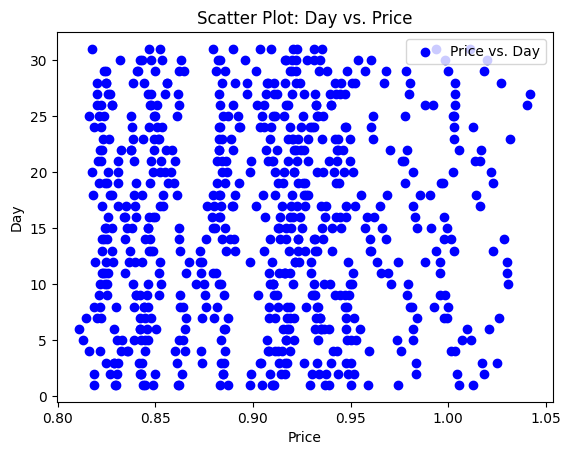

In [14]:

# Create a scatter plot
plt.scatter(data['Price']    , data['Day'] , label='Price vs. Day', color='blue', marker='o')

# Add labels and a title
plt.xlabel('Price')
plt.ylabel('Day')
plt.title('Scatter Plot: Day vs. Price')

# Add a legend (optional)
plt.legend()


plt.show()


In [15]:
import plotly.express as px

# Assuming 'data' is a DataFrame containing your data

# Create a scatter plot with Plotly Express
fig = px.scatter(data, x='Price', y='Day', title='Scatter Plot: Day vs. Price', 
                 labels={'Price': 'Price', 'Date': 'Day'}, color_discrete_sequence=['blue'])


fig.update_layout(
    autosize=False,
    width=800,
    height=600,)

# Show the plot
fig.show()


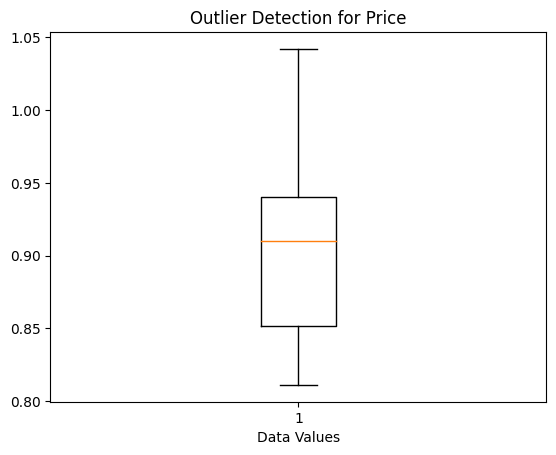

In [16]:
# Create a box plot
plt.boxplot(data['Price'], vert=True)  # vert=False for a horizontal box plot
plt.title('Outlier Detection for Price')
plt.xlabel('Data Values')
plt.show()

In [17]:
import plotly.express as px
import numpy as np


# Create a box plot with Plotly
fig = px.box(data['Price'], title='Outlier Detection for prices  USD/EUR  ')

fig.update_layout(
    autosize=False,
    width=800,
    height=600,)
# Show the plot
fig.show()

In [24]:
import pandas as pd
import plotly.figure_factory as ff


correlation_matrix = data[['Day','Price','Month','Year',]].corr()

fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values.round(4),
    x=list(correlation_matrix.columns),
    y=list(correlation_matrix.index),
    colorscale='Viridis',
    showscale=True
)

fig.update_layout(
    title='Correlation Heatmap',
    
    xaxis=dict(title='Variables'),
    yaxis=dict(title='Variables'),


    autosize=False,
    width=800,
    height=600,
    
)

fig.show()



In [25]:
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LinearRegression


In [26]:
# Prepare data for modeling by defining target and feature
X = data[['Day']]  # X needs to be 2-dimensional so we need double brackets here
y = data['Price']

In [27]:
X.shape

(693, 1)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Instantiate our model 
lin_reg = LinearRegression()

# Train the model using our data
lin_reg.fit(X_train, y_train)

LinearRegression()

In [30]:
# Intercept and slope/coefficient can be accessed via .intercept_ and .coef_
intercept = lin_reg.intercept_
slope = lin_reg.coef_[0]
print("Model intercept:", intercept)
print("Coefficient for feature weight:", slope)

Model intercept: 0.8988600069811108
Coefficient for feature weight: 0.0002618225717136622


In [31]:
# Import r-squared from sklearn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [32]:
from my_method import mean_absolute_error
from my_method import mean_absolute_percentage_error
# Calculate the estimated value for each data point
y_hat = lin_reg.predict(X_test)


# Calculate the R-squared for our model to evaluate metrics of  model and it's efficient 
print("R-squared:", r2_score(y_test, y_hat).round(3))

# Evaluate the model error by mean square error 
mse = mean_squared_error(y_test, y_hat)
print(f"Mean Squared Error: {mse}")

# Evaluate the model error by mean absolute percentage error 
mape = mean_absolute_percentage_error(y_test, y_hat)
print(f"Mean absolute percentage error : {mape.round(4)} %")


# Evaluate the model error by mean absolute  error 
mae = mean_absolute_error(y_test, y_hat)
print(f"Mean absolute  error : {mae.round(4)} ")




R-squared: -0.021
Mean Squared Error: 0.0032549117579095906
Mean absolute percentage error : 5.2988 %
Mean absolute  error : 0.0482 


In [33]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load and preprocess your dataset, split into X (features) and y (target variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [34]:
# Create and train an Elastic Net regression model
elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5)  # You can adjust alpha and l1_ratio
elastic_net.fit(X_train, y_train)



ElasticNet(alpha=0.5)

In [35]:
from my_method import mean_absolute_error
from my_method import mean_absolute_percentage_error
# Make predictions
y_pred = elastic_net.predict(X_test)

# Evaluate the model by R_2
print("R-squared:", r2_score(y_test, y_pred).round(3))

# Evaluate the model error by mean square error 
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse.round(4)}")



#  Evaluate the model error by mean absolute percentage error 
mape =mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean absolute percentage error : {mape.round(4)} %")



# Evaluate the model error by mean absolute error 
mae = mean_absolute_error(y_test, y_hat)
print(f"Mean absolute  error : {mae.round(4)} ")

# Use the trained model for making predictions on new data
#new_data_predictions = elastic_net.predict(new_data)

R-squared: -0.014
Mean Squared Error: 0.0032
Mean absolute percentage error : 5.2862 %
Mean absolute  error : 0.0482 
